In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('C:\\Users\\LENOVO\\Titanic.xlsx')

In [4]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [7]:
df

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,NaN,0
889,1,male,26.0,1


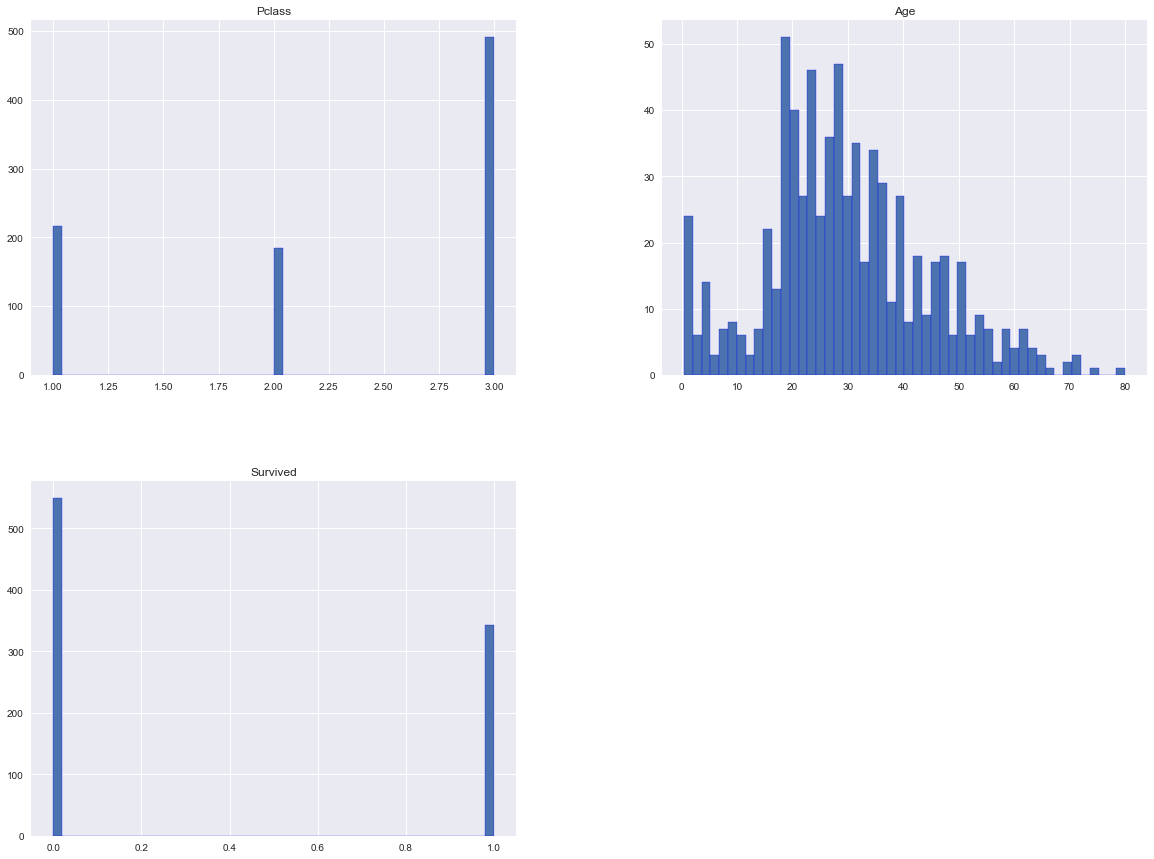

In [10]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [12]:
q=df['Age'].median()
df['Age'].fillna(q,inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17780\2021151754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Age']> higher_fence].fillna(q,inplace=True)


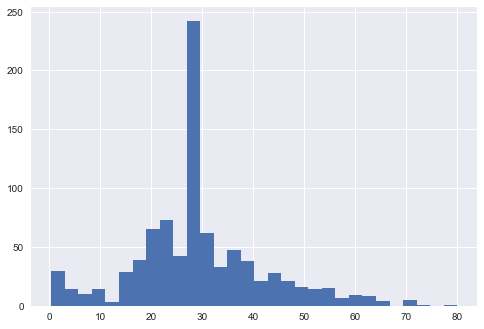

In [13]:
x=df['Age']
y=x.to_numpy()
z=np.sort(y)
Q1=np.percentile(z,25)
Q3=np.percentile(z,75)
IQR =Q3-Q1
lower_fence =Q1-(1.5*IQR)
higher_fence =Q3+(1.5*IQR)
df[df['Age']> higher_fence].fillna(q,inplace=True)
plt.hist(z,bins=30)
plt.show()

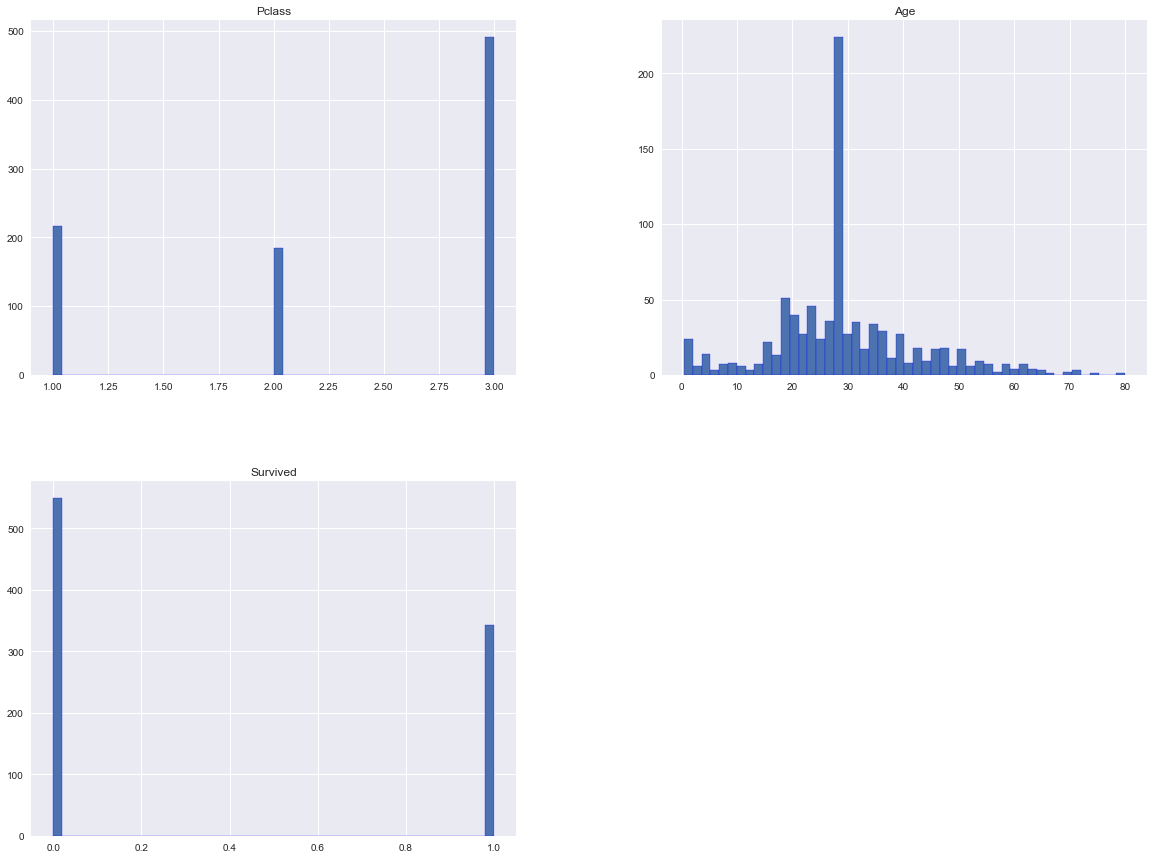

In [14]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [15]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

In [16]:
final =pd.get_dummies(data=df,columns=['Pclass','Sex'],drop_first=True)

In [17]:
final.head()

,Age,Survived,Pclass_2,Pclass_3,Sex_male
0,22.0,0,0,1,1
1,38.0,1,0,0,0
2,26.0,1,0,1,0
3,35.0,1,0,0,0
4,35.0,0,0,1,1


In [18]:
X=final.drop(['Survived'],axis=1)
x

In [19]:
y=final.Survived

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20,random_state=42)

In [29]:
X_train

,Age,Pclass_2,Pclass_3,Sex_male
331,45.5,0,0,1
733,23.0,1,0,1
382,32.0,0,1,1
704,26.0,0,1,1
813,6.0,0,1,0
...,...,...,...,...
106,21.0,0,1,0
270,28.0,0,0,1
860,41.0,0,1,1
435,14.0,0,0,0


In [30]:
from sklearn.naive_bayes import BernoulliNB

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=BernoulliNB()

In [33]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8044692737430168

In [34]:
model.fit(X_train,y_train)

BernoulliNB()

In [35]:
model.score(X_test,y_test)

0.7821229050279329

In [36]:
y_test.shape

(179,)

In [37]:
X_test[:5]

,Age,Pclass_2,Pclass_3,Sex_male
709,28.0,0,1,1
439,31.0,1,0,1
840,20.0,0,1,1
720,6.0,1,0,0
39,14.0,0,1,0


In [44]:
y_pred=model.predict(X_test)

In [40]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
import seaborn as sns

In [45]:
cm=confusion_matrix(y_test,y_pred)

In [46]:
import matplotlib.pyplot as plt

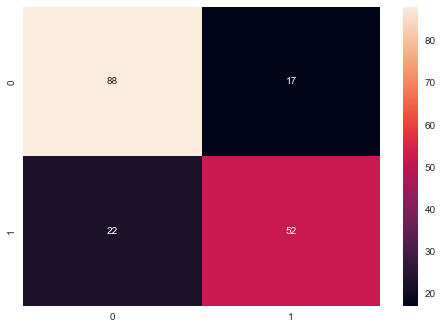

In [47]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()